In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Transformaciones de aumento de datos para el conjunto de entrenamiento

In [3]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Transformaciones para el conjunto de prueba (sin aumentar los datos

In [4]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Cargar el conjunto de entrenamiento y prueba

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

100%|██████████| 170498071/170498071 [00:01<00:00, 105770240.63it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Definir la arquitectura del modelo CNN

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

net = Net()

# Definir la función de pérdida y el optimizador

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

# Entrenar el modelo
def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 200 == 199:  # Imprimir cada 200 mini-lotes
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 200:.3f}")
                running_loss = 0.0

    print("Finished Training")

# Evaluar el modelo en el conjunto de prueba

In [12]:
def test_model(model, dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")

# Entrenar y evaluar el modelo

In [13]:
train_model(net, criterion, optimizer, num_epochs=10)
test_model(net, testloader)

[Epoch 1, Batch 200] Loss: 2.169
[Epoch 1, Batch 400] Loss: 1.977
[Epoch 1, Batch 600] Loss: 1.824
[Epoch 1, Batch 800] Loss: 1.754
[Epoch 1, Batch 1000] Loss: 1.678
[Epoch 1, Batch 1200] Loss: 1.624
[Epoch 1, Batch 1400] Loss: 1.597
[Epoch 2, Batch 200] Loss: 1.524
[Epoch 2, Batch 400] Loss: 1.467
[Epoch 2, Batch 600] Loss: 1.426
[Epoch 2, Batch 800] Loss: 1.396
[Epoch 2, Batch 1000] Loss: 1.381
[Epoch 2, Batch 1200] Loss: 1.327
[Epoch 2, Batch 1400] Loss: 1.337
[Epoch 3, Batch 200] Loss: 1.269
[Epoch 3, Batch 400] Loss: 1.234
[Epoch 3, Batch 600] Loss: 1.252
[Epoch 3, Batch 800] Loss: 1.215
[Epoch 3, Batch 1000] Loss: 1.218
[Epoch 3, Batch 1200] Loss: 1.205
[Epoch 3, Batch 1400] Loss: 1.153
[Epoch 4, Batch 200] Loss: 1.144
[Epoch 4, Batch 400] Loss: 1.131
[Epoch 4, Batch 600] Loss: 1.140
[Epoch 4, Batch 800] Loss: 1.095
[Epoch 4, Batch 1000] Loss: 1.095
[Epoch 4, Batch 1200] Loss: 1.111
[Epoch 4, Batch 1400] Loss: 1.092
[Epoch 5, Batch 200] Loss: 1.056
[Epoch 5, Batch 400] Loss: 1.07

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Transformaciones de preprocesamiento para el conjunto de entrenamiento y prueba
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Cargar el conjunto de entrenamiento y prueba
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Definir la arquitectura de una red sencilla basada en LeNet
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleNet()

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-4)

# Función de entrenamiento
def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Modo de entrenamiento
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:  # Imprimir cada 100 mini-lotes
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
                running_loss = 0.0

    print("Finished Training")

# Función de evaluación
def test_model(model, dataloader):
    model.eval()  # Modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")

# Entrenar y evaluar el modelo
train_model(net, criterion, optimizer, num_epochs=10)
test_model(net, testloader)



Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, Batch 100] Loss: 2.122
[Epoch 1, Batch 200] Loss: 1.894
[Epoch 1, Batch 300] Loss: 1.795
[Epoch 1, Batch 400] Loss: 1.740
[Epoch 1, Batch 500] Loss: 1.696
[Epoch 1, Batch 600] Loss: 1.649
[Epoch 1, Batch 700] Loss: 1.618
[Epoch 2, Batch 100] Loss: 1.579
[Epoch 2, Batch 200] Loss: 1.582
[Epoch 2, Batch 300] Loss: 1.540
[Epoch 2, Batch 400] Loss: 1.556
[Epoch 2, Batch 500] Loss: 1.532
[Epoch 2, Batch 600] Loss: 1.481
[Epoch 2, Batch 700] Loss: 1.467
[Epoch 3, Batch 100] Loss: 1.463
[Epoch 3, Batch 200] Loss: 1.456
[Epoch 3, Batch 300] Loss: 1.411
[Epoch 3, Batch 400] Loss: 1.438
[Epoch 3, Batch 500] Loss: 1.435
[Epoch 3, Batch 600] Loss: 1.389
[Epoch 3, Batch 700] Loss: 1.399
[Epoch 4, Batch 100] Loss: 1.378
[Epoch 4, Batch 200] Loss: 1.365
[Epoch 4, Batch 300] Loss: 1.361
[Epoch 4, Batch 400] Loss: 1.372
[Epoch 4, Batch 500] Loss: 1.353
[Epoch 4, Batch 600] Loss: 1.355
[Epoch 4, Batch 700] Loss: 1.341


Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, Batch 100] Loss: 2.103
[Epoch 1, Batch 200] Loss: 1.880
[Epoch 1, Batch 300] Loss: 1.787
[Epoch 1, Batch 400] Loss: 1.721
[Epoch 1, Batch 500] Loss: 1.695
[Epoch 1, Batch 600] Loss: 1.693
[Epoch 1, Batch 700] Loss: 1.652
[Epoch 2, Batch 100] Loss: 1.589
[Epoch 2, Batch 200] Loss: 1.596
[Epoch 2, Batch 300] Loss: 1.566
[Epoch 2, Batch 400] Loss: 1.546
[Epoch 2, Batch 500] Loss: 1.531
[Epoch 2, Batch 600] Loss: 1.514
[Epoch 2, Batch 700] Loss: 1.495
[Epoch 3, Batch 100] Loss: 1.469
[Epoch 3, Batch 200] Loss: 1.471
[Epoch 3, Batch 300] Loss: 1.434
[Epoch 3, Batch 400] Loss: 1.420
[Epoch 3, Batch 500] Loss: 1.434
[Epoch 3, Batch 600] Loss: 1.430
[Epoch 3, Batch 700] Loss: 1.422
[Epoch 4, Batch 100] Loss: 1.391
[Epoch 4, Batch 200] Loss: 1.388
[Epoch 4, Batch 300] Loss: 1.385
[Epoch 4, Batch 400] Loss: 1.379
[Epoch 4, Batch 500] Loss: 1.367
[Epoch 4, Batch 600] Loss: 1.374
[Epoch 4, Batch 700] Loss: 1.362


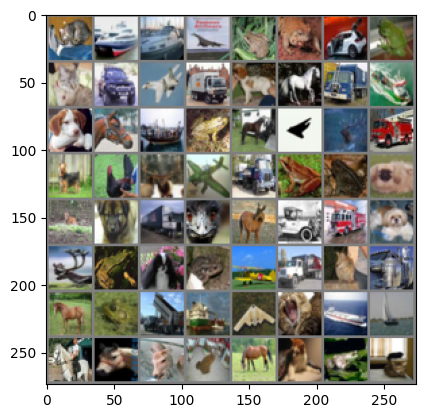

Etiquetas reales:  3 8 8 0
Etiquetas predichas:  3 8 8 8
Accuracy on the test set: 61.75%


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Transformaciones de preprocesamiento para el conjunto de entrenamiento y prueba
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Cargar el conjunto de entrenamiento y prueba
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Función para mostrar imágenes
def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar la imagen
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Función para entrenar y evaluar el modelo
def train_and_evaluate_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Modo de entrenamiento
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:  # Imprimir cada 100 mini-lotes
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
                running_loss = 0.0

    print("Finished Training")

    # Imprimir imágenes después de entrenar
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    imshow(torchvision.utils.make_grid(images))
    print('Etiquetas reales: ', ' '.join(f'{labels[j]}' for j in range(4)))

    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    print('Etiquetas predichas: ', ' '.join(f'{predicted[j]}' for j in range(4)))

    # Evaluación del modelo
    model.eval()  # Modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")

# Definir la arquitectura de una red sencilla basada en LeNet
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Entrenar y evaluar el modelo
net = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-4)
train_and_evaluate_model(net, criterion, optimizer, num_epochs=10)


Files already downloaded and verified
Files already downloaded and verified
[1, 200] Loss: 1.996
[1, 400] Loss: 1.612
[1, 600] Loss: 1.422
[1, 800] Loss: 1.351
[1, 1000] Loss: 1.264
[1, 1200] Loss: 1.219
[1, 1400] Loss: 1.171
[2, 200] Loss: 1.022
[2, 400] Loss: 0.985
[2, 600] Loss: 0.951
[2, 800] Loss: 0.960
[2, 1000] Loss: 0.941
[2, 1200] Loss: 0.929
[2, 1400] Loss: 0.912
[3, 200] Loss: 0.749
[3, 400] Loss: 0.733
[3, 600] Loss: 0.743
[3, 800] Loss: 0.723
[3, 1000] Loss: 0.768
[3, 1200] Loss: 0.730
[3, 1400] Loss: 0.744
[4, 200] Loss: 0.515
[4, 400] Loss: 0.520
[4, 600] Loss: 0.539
[4, 800] Loss: 0.562
[4, 1000] Loss: 0.569
[4, 1200] Loss: 0.568
[4, 1400] Loss: 0.571
[5, 200] Loss: 0.336
[5, 400] Loss: 0.328
[5, 600] Loss: 0.352
[5, 800] Loss: 0.376
[5, 1000] Loss: 0.391
[5, 1200] Loss: 0.408
[5, 1400] Loss: 0.435
[6, 200] Loss: 0.195
[6, 400] Loss: 0.196
[6, 600] Loss: 0.212
[6, 800] Loss: 0.243
[6, 1000] Loss: 0.257
[6, 1200] Loss: 0.280
[6, 1400] Loss: 0.292
[7, 200] Loss: 0.134
[7,

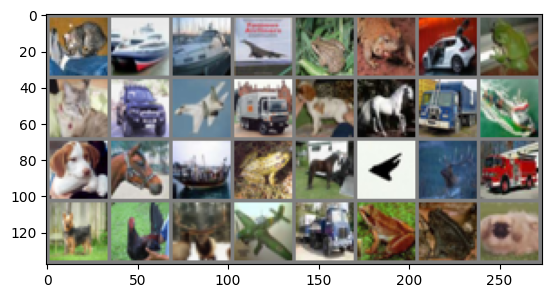

True Label:  tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5])
Predicted Label:  tensor([3, 1, 8, 0, 3, 6, 1, 6, 3, 1, 4, 9, 3, 7, 9, 6, 5, 7, 8, 6, 3, 2, 4, 9,
        4, 4, 4, 0, 9, 6, 6, 2])


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

for epoch in range(10):  # Change the number of epochs as needed
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f"[{epoch + 1}, {i + 1}] Loss: {running_loss / 200:.3f}")
            running_loss = 0.0

print("Finished Training")

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test set: {(100 * correct / total):.2f}%")

def imshow(img):
    img = img / 2 + 0.5     # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

for data in testloader:
    images, labels = data
    imshow(torchvision.utils.make_grid(images))  # Show the image
    print('True Label: ', labels)

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    print('Predicted Label: ', predicted)
    break

